<a href="https://colab.research.google.com/github/brandim04/CienciaDeDados/blob/main/Atvd_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fuzzywuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fuzzywuzzy import fuzz
import glob
import os

/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oleksiimartusiuk/e-commerce-data-shein")

print("Path to dataset files:", path)

100%|██████████| 3.44M/3.44M [00:00<00:00, 121MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/oleksiimartusiuk/e-commerce-data-shein/versions/4


In [7]:
files_to_process = [
    '/root/.cache/kagglehub/datasets/oleksiimartusiuk/e-commerce-data-shein/versions/4/us-shein-womens_clothing-4620.csv',
    '/root/.cache/kagglehub/datasets/oleksiimartusiuk/e-commerce-data-shein/versions/4/us-shein-mens_clothes-1891.csv'
]

# Carregar e concatenar
df_list = [pd.read_csv(f) for f in files_to_process]
df = pd.concat(df_list, ignore_index=True)
print(f"Tamanho do dataset concatenado: {df.shape}")

Tamanho do dataset concatenado: (6509, 8)


In [8]:
print("Informações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

print("\nPorcentagem de valores ausentes por coluna:")
print(df.isnull().mean() * 100)

print("\nNúmero de duplicatas:", df.duplicated().sum())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product-locatelabels-img src  3622 non-null   object 
 1   color-count                   3556 non-null   float64
 2   goods-title-link              6508 non-null   object 
 3   rank-title                    1616 non-null   object 
 4   rank-sub                      1616 non-null   object 
 5   price                         6508 non-null   object 
 6   discount                      4612 non-null   object 
 7   selling_proposition           4729 non-null   object 
dtypes: float64(1), object(7)
memory usage: 406.9+ KB
None

Estatísticas descritivas:
       color-count
count  3556.000000
mean      8.791057
std       5.099785
min       4.000000
25%       5.000000
50%       7.000000
75%      11.000000
max      38.000000

Valores ausentes por c

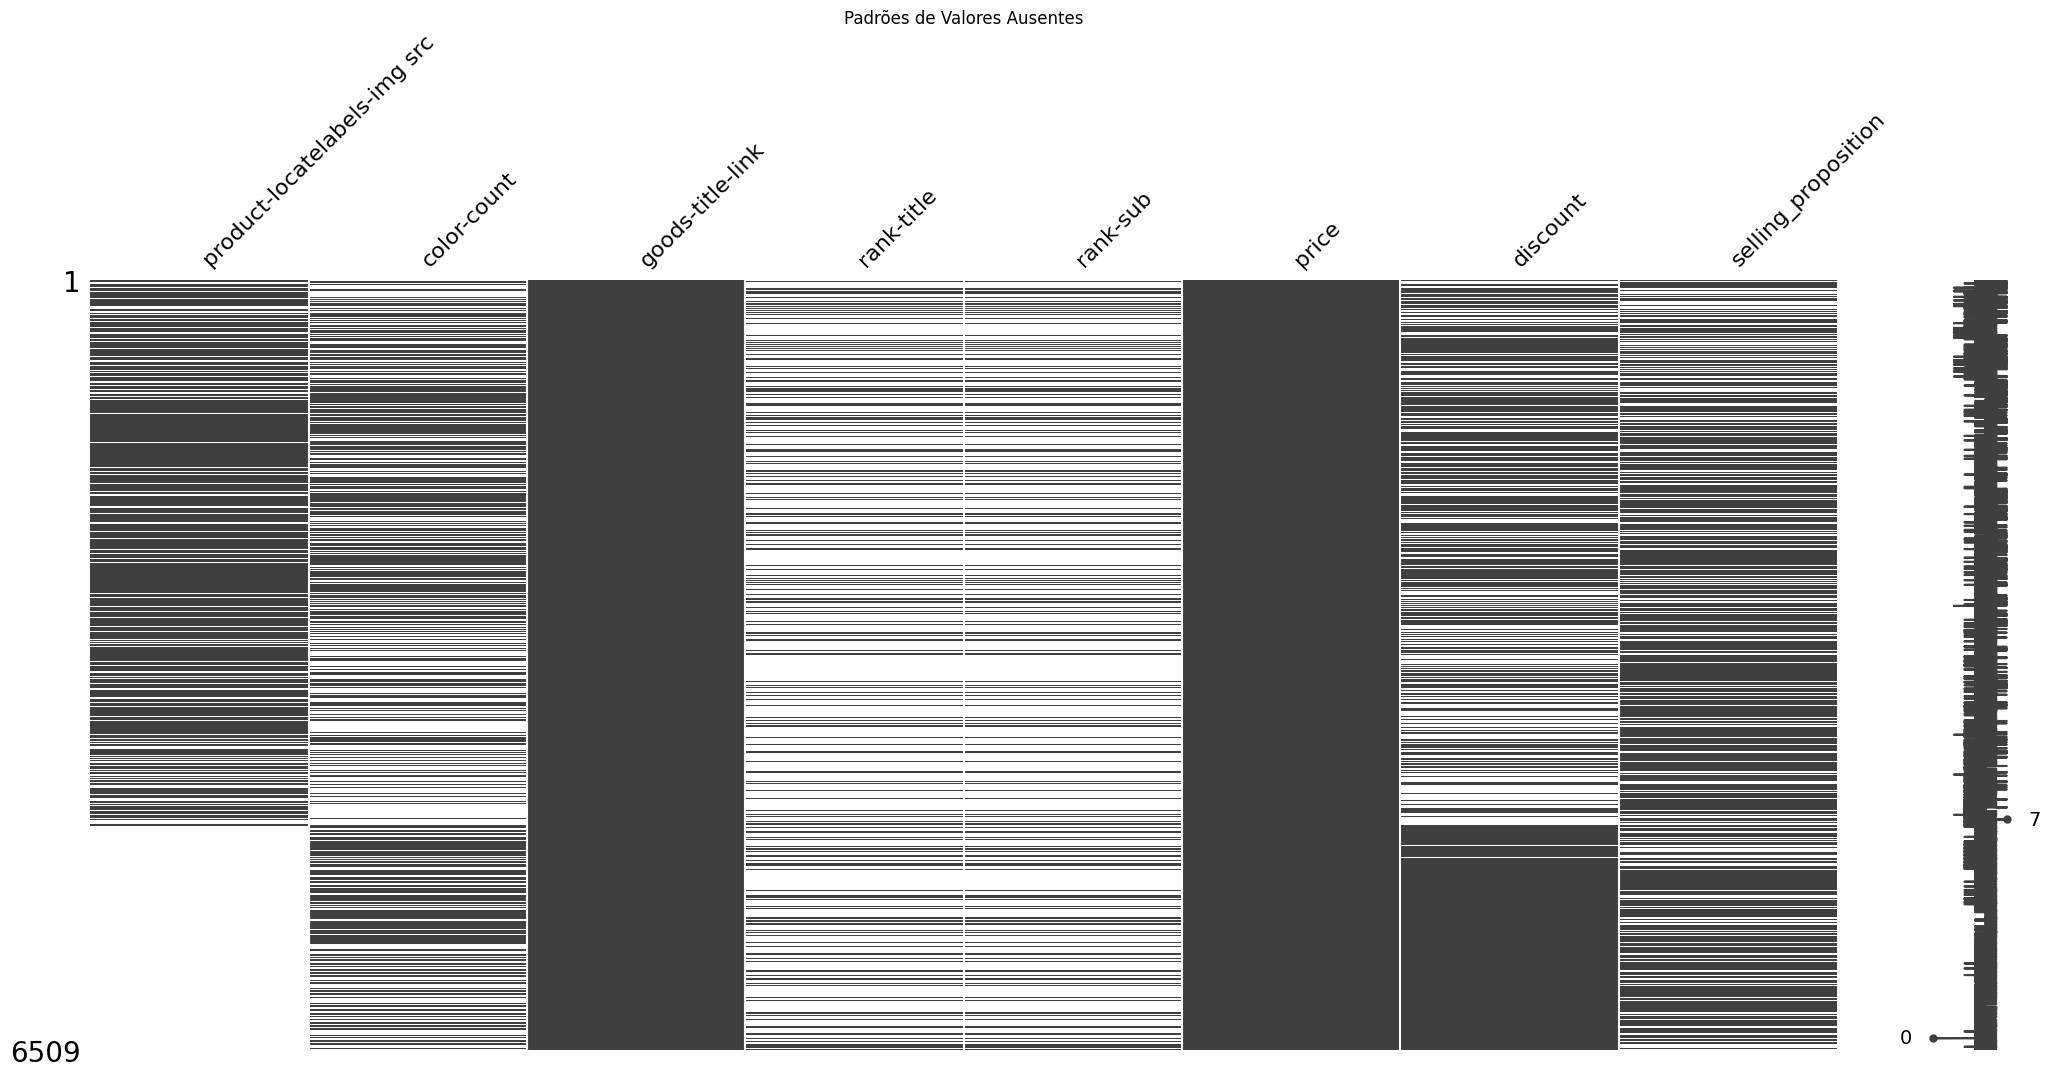

In [9]:
msno.matrix(df)
plt.title('Padrões de Valores Ausentes')
plt.show()

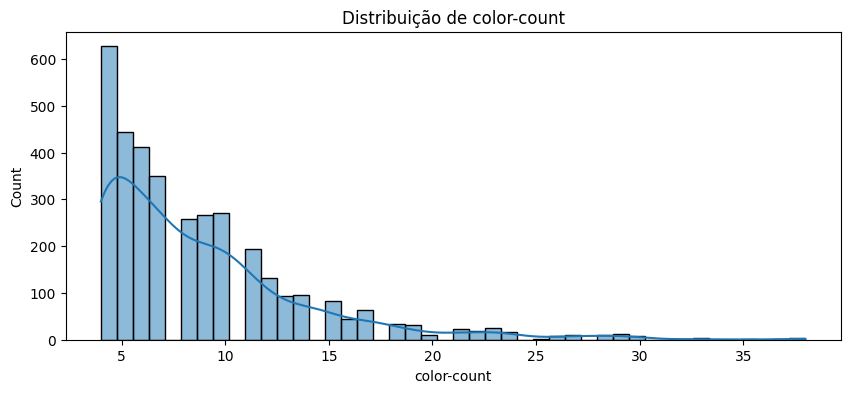

In [10]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols[:5]:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

In [11]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna('Desconhecido', inplace=True)

/tmp/ipython-input-3710832246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3710832246.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [12]:
df.drop_duplicates(inplace=True)
print(f"Tamanho após remoção de duplicatas: {df.shape}")

Tamanho após remoção de duplicatas: (6065, 8)


In [13]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.title()

In [14]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

for col in numeric_cols:
    lower = Q1[col] - 1.5*IQR[col]
    upper = Q3[col] + 1.5*IQR[col]
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [15]:
if 'Price' in df.columns:
    df['Price_Category'] = pd.cut(df['Price'], bins=[0,50,150,500,1000], labels=['Low','Medium','High','Very High'])

In [17]:
print("Estatísticas finais:")
print(df.describe())
print("\nValores ausentes finais:")
print(df.isnull().sum())
print("\nDuplicatas finais:")
print(df.duplicated().sum())
print(f"Tamanho final do dataset limpo: {df.shape}")

Estatísticas finais:
       color-count
count  6065.000000
mean      7.254246
std       1.298178
min       5.500000
25%       7.000000
50%       7.000000
75%       8.000000
max       9.500000

Valores ausentes finais:
product-locatelabels-img src    0
color-count                     0
goods-title-link                0
rank-title                      0
rank-sub                        0
price                           0
discount                        0
selling_proposition             0
dtype: int64

Duplicatas finais:
0
Tamanho final do dataset limpo: (6065, 8)
